# Statistics for Data Analytics
# Question : Explore and evaluate datasets using descriptive statistical analyses. (PLO 1) 

In [1]:
import pandas as pd

In [126]:
MonthlyUnemployment_DF=pd.read_csv('MUM01.20231006T231032.csv')

### We read the data from csv. Now before going for descriptie analysis.
### Lets explore our data first. This way we will have a better sense about our data.

In [91]:
# We loaded our data using pandas. Now let's see how our data looks like. We can do that by using head method and this
# method takes parameter as well. If we pass 10 as parameter so it will show us 10 observasions from our data. so we
# an clearly look how our data look like.
MonthlyUnemployment_DF.head(10)

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
0,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Both sexes,%,13.3,Thousand,55.4
1,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Male,%,13.7,Thousand,31.5
2,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Female,%,12.7,Thousand,23.9
3,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Both sexes,%,7.4,Thousand,96.2
4,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Male,%,6.9,Thousand,55.4
5,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Female,%,8.1,Thousand,40.8
6,Seasonally Adjusted Monthly Unemployment Rate,1998 February,15 - 24 years,Both sexes,%,13.1,Thousand,54.2
7,Seasonally Adjusted Monthly Unemployment Rate,1998 February,15 - 24 years,Male,%,13.7,Thousand,30.9
8,Seasonally Adjusted Monthly Unemployment Rate,1998 February,15 - 24 years,Female,%,12.4,Thousand,23.3
9,Seasonally Adjusted Monthly Unemployment Rate,1998 February,25 - 74 years,Both sexes,%,7.6,Thousand,99.1


In [4]:
# Head method shows us few rows of our data, so we can understand it. but lets's check how many total rows and colums do 
# we have in our data. we can use Shape keyword  for that.
MonthlyUnemployment_DF.shape

(1854, 8)

In [5]:
# Now to check the total number of features in our dataset. we can use column keyword for that.
MonthlyUnemployment_DF.columns

Index(['Statistic Label', 'Month', 'Age Group', 'Sex', 'UNIT',
       'VALUE In Percentage', 'UNIT.1', 'VALUE In Thousands'],
      dtype='object')

In [6]:
# Now lets check the data types of our data. so if there is something wrong with the data types we can fix it. for example
# if some numarical data has object type it neans it should be converted into the int/float. we can check data types by 
# using info() method.
MonthlyUnemployment_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      1854 non-null   object 
 1   Month                1854 non-null   object 
 2   Age Group            1854 non-null   object 
 3   Sex                  1854 non-null   object 
 4   UNIT                 1854 non-null   object 
 5   VALUE In Percentage  1854 non-null   float64
 6   UNIT.1               1854 non-null   object 
 7   VALUE In Thousands   1854 non-null   float64
dtypes: float64(2), object(6)
memory usage: 116.0+ KB


In [7]:
# As we Noticed in the above statement that the Month column has string data type. So later we need this column to perform
# some operation on. and we can't do that on string so we are changing it into

#in the following line we are using the to_datetime() function to convert the datatype to datetime
MonthlyUnemployment_DF['Month'] = pd.to_datetime(MonthlyUnemployment_DF['Month'])
# In the following line we are formating the datetime values to Year - Month Format
MonthlyUnemployment_DF['Month'] = MonthlyUnemployment_DF['Month'].dt.strftime('%Y - %m')


### Now We Know how our data looks like. We know how many columns and rows it contains and. data types of each feature. So lets dig into descriptie analysis.

In [8]:
# We are checking the null values in each column using isnull and sum function. is null will check for null values and 
# sum will give us the total number of null values of each column

NullValues=MonthlyUnemployment_DF.isnull().sum()
print(NullValues)

Statistic Label        0
Month                  0
Age Group              0
Sex                    0
UNIT                   0
VALUE In Percentage    0
UNIT.1                 0
VALUE In Thousands     0
dtype: int64


In [9]:
# Furthermore we can get unique values for categorical columns. Since we have multiple categorical columns.
# We can loop each column and check for unique value in it. Unique function will check for unique values 
# in the current column. And then we are just printing them.

categorical_columns= MonthlyUnemployment_DF.select_dtypes(include=['object'])

for column in categorical_columns.columns:
    uniqueValues=MonthlyUnemployment_DF[column].unique()
    
    print(f"Unique aluesin {column}:")
    print(uniqueValues)
    



Unique aluesin Statistic Label:
['Seasonally Adjusted Monthly Unemployment Rate']
Unique aluesin Month:
['1998 - 01' '1998 - 02' '1998 - 03' '1998 - 04' '1998 - 05' '1998 - 06'
 '1998 - 07' '1998 - 08' '1998 - 09' '1998 - 10' '1998 - 11' '1998 - 12'
 '1999 - 01' '1999 - 02' '1999 - 03' '1999 - 04' '1999 - 05' '1999 - 06'
 '1999 - 07' '1999 - 08' '1999 - 09' '1999 - 10' '1999 - 11' '1999 - 12'
 '2000 - 01' '2000 - 02' '2000 - 03' '2000 - 04' '2000 - 05' '2000 - 06'
 '2000 - 07' '2000 - 08' '2000 - 09' '2000 - 10' '2000 - 11' '2000 - 12'
 '2001 - 01' '2001 - 02' '2001 - 03' '2001 - 04' '2001 - 05' '2001 - 06'
 '2001 - 07' '2001 - 08' '2001 - 09' '2001 - 10' '2001 - 11' '2001 - 12'
 '2002 - 01' '2002 - 02' '2002 - 03' '2002 - 04' '2002 - 05' '2002 - 06'
 '2002 - 07' '2002 - 08' '2002 - 09' '2002 - 10' '2002 - 11' '2002 - 12'
 '2003 - 01' '2003 - 02' '2003 - 03' '2003 - 04' '2003 - 05' '2003 - 06'
 '2003 - 07' '2003 - 08' '2003 - 09' '2003 - 10' '2003 - 11' '2003 - 12'
 '2004 - 01' '2004 -

In [10]:
# We using describe() method to generate desriptive statistics.
MonthlyUnemployment_DF.describe()

,VALUE In Percentage,VALUE In Thousands
count,1854.000000,1854.000000
mean,10.680529,56.665696
std,7.539243,48.541094
min,2.900000,11.000000
25%,4.700000,25.200000
50%,8.800000,39.000000
75%,13.200000,69.675000
max,39.300000,268.400000


In [11]:
# One more important thing to check in data is look for duplicate rows. we will use the same technique that we used to
# check for null rows. we will use duplicate method with sum to look for any duplocate rows in out dataset.
print("Dublicated Rows: " ,MonthlyUnemployment_DF.duplicated().sum())

Dublicated Rows:  0


### Lets calculate the median. Since we explored the data above and we have data from 1998 to 2023. and it is divided by age groups and sex. so now we will use pandas liabriary to calculate the mean of each yaer, month, gender, and age group. for e.g. (1998-Jan -  15-24 - Male and then for same year and month and of same age group for female and so on)

In [12]:
#As I have explained above that we need to group the data by Month, Age Group, and Sex. so we are using 
# groupby function to do that.
groupedMeanBySexAndAgeAndYear=MonthlyUnemployment_DF.groupby(['Month', 'Age Group', 'Sex'])

# Here we are calculating mean for each group we created above and conerting our resilt into seprate dataframe
# And after that just printing the values
meanInPercentage=groupedMeanBySexAndAgeAndYear['VALUE In Percentage'].mean()
meanInThousands=groupedMeanBySexAndAgeAndYear['VALUE In Thousands'].mean()

meanPercentageDF=meanInPercentage.reset_index()
meanThousandsDF=meanInThousands.reset_index()

print("Mean In Percentage")
print(meanPercentageDF)
print("Mean In Thousands")
print(meanThousandsDF)

Mean In Percentage
          Month      Age Group         Sex  VALUE In Percentage
0     1998 - 01  15 - 24 years  Both sexes                 13.3
1     1998 - 01  15 - 24 years      Female                 12.7
2     1998 - 01  15 - 24 years        Male                 13.7
3     1998 - 01  25 - 74 years  Both sexes                  7.4
4     1998 - 01  25 - 74 years      Female                  8.1
...         ...            ...         ...                  ...
1849  2023 - 09  15 - 24 years      Female                 11.3
1850  2023 - 09  15 - 24 years        Male                 12.5
1851  2023 - 09  25 - 74 years  Both sexes                  3.1
1852  2023 - 09  25 - 74 years      Female                  2.9
1853  2023 - 09  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Mean In Thousands
          Month      Age Group         Sex  VALUE In Thousands
0     1998 - 01  15 - 24 years  Both sexes                55.4
1     1998 - 01  15 - 24 years      Female  

In [14]:
# Now to After successfully finding mean for each age group and per month of each year and by sex. lets calculate 
# median using thh same way. we can calculate median by mmedian method.


medianGroupedByMonthAgeAndSex= MonthlyUnemployment_DF.groupby(['Month', 'Age Group','Sex'])
medianInPercentage=medianGroupedByMonthAgeAndSex['VALUE In Percentage'].median()
medianInThousands=medianGroupedByMonthAgeAndSex['VALUE In Thousands'].median()


medianInPercentageDF=medianInPercentage.reset_index()
medianInThousandsDF=medianInThousands.reset_index()

print("Median In Percentage")
print(medianInPercentageDF)
print("Median In Thousands")
print(medianInThousandsDF)


Median In Percentage
          Month      Age Group         Sex  VALUE In Percentage
0     1998 - 01  15 - 24 years  Both sexes                 13.3
1     1998 - 01  15 - 24 years      Female                 12.7
2     1998 - 01  15 - 24 years        Male                 13.7
3     1998 - 01  25 - 74 years  Both sexes                  7.4
4     1998 - 01  25 - 74 years      Female                  8.1
...         ...            ...         ...                  ...
1849  2023 - 09  15 - 24 years      Female                 11.3
1850  2023 - 09  15 - 24 years        Male                 12.5
1851  2023 - 09  25 - 74 years  Both sexes                  3.1
1852  2023 - 09  25 - 74 years      Female                  2.9
1853  2023 - 09  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Median In Thousands
          Month      Age Group         Sex  VALUE In Thousands
0     1998 - 01  15 - 24 years  Both sexes                55.4
1     1998 - 01  15 - 24 years      Fema

# Now let's more understand our data by finding standard deviation, min and max

In [15]:
#Finding Standard Deviation
#stdGroupedByMonthAgeAndSex= MonthlyUnemployment_DF.groupby(['Month', 'Age Group','Sex'])
#stdInPercentage=medianGroupedByMonthAgeAndSex['VALUE In Percentage'].std()
#stdInThousands=medianGroupedByMonthAgeAndSex['VALUE In Thousands'].std()


#stdInPercentageDF=stdInPercentage.reset_index()
#stdInThousandsDF=stdInThousands.reset_index()



#print("Standarad Deviation In Percentage")
#print(stdInPercentageDF)
#print("Standarad Deviation In Thousands")
#print(stdInThousandsDF)*/

In [16]:
# We are using the same way for minimum we used to find median and mean 
# we will group by Month, Age Group, Sex. then find the minimum in each group we created  and convert it into 
# new dataframe and and display it.

minGroupedByMonthAgeAndSex = MonthlyUnemployment_DF.groupby(['Month', 'Age Group', 'Sex'])

minInPercentage = minGroupedByMonthAgeAndSex['VALUE In Percentage'].min()
minInThousands = minGroupedByMonthAgeAndSex['VALUE In Thousands'].min()

minInPercentageDF = minInPercentage.reset_index()
minInThousandsDF = minInThousands.reset_index()

print("Minimum in Percentage:")
print(minInPercentageDF)

print("Minimum  in Thousands:")
print(minInThousandsDF)


Minimum in Percentage:
          Month      Age Group         Sex  VALUE In Percentage
0     1998 - 01  15 - 24 years  Both sexes                 13.3
1     1998 - 01  15 - 24 years      Female                 12.7
2     1998 - 01  15 - 24 years        Male                 13.7
3     1998 - 01  25 - 74 years  Both sexes                  7.4
4     1998 - 01  25 - 74 years      Female                  8.1
...         ...            ...         ...                  ...
1849  2023 - 09  15 - 24 years      Female                 11.3
1850  2023 - 09  15 - 24 years        Male                 12.5
1851  2023 - 09  25 - 74 years  Both sexes                  3.1
1852  2023 - 09  25 - 74 years      Female                  2.9
1853  2023 - 09  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Minimum  in Thousands:
          Month      Age Group         Sex  VALUE In Thousands
0     1998 - 01  15 - 24 years  Both sexes                55.4
1     1998 - 01  15 - 24 years     

In [17]:
# Same way for maximum, group by Month, Age Group, Sex. then find the maximum in each group we created  and convert it into 
# new dataframe and and display it.

maxGroupedByMonthAgeAndSex = MonthlyUnemployment_DF.groupby(['Month', 'Age Group', 'Sex'])

maxInPercentage = maxGroupedByMonthAgeAndSex['VALUE In Percentage'].max()
maxInThousands = maxGroupedByMonthAgeAndSex['VALUE In Thousands'].max()

maxInPercentageDF = maxInPercentage.reset_index()
maxInThousandsDF = maxInThousands.reset_index()

print("Maximum in Percentage:")
print(maxInPercentageDF)

print("Maximum  in Thousands:")
print(maxInThousandsDF)



Maximum in Percentage:
          Month      Age Group         Sex  VALUE In Percentage
0     1998 - 01  15 - 24 years  Both sexes                 13.3
1     1998 - 01  15 - 24 years      Female                 12.7
2     1998 - 01  15 - 24 years        Male                 13.7
3     1998 - 01  25 - 74 years  Both sexes                  7.4
4     1998 - 01  25 - 74 years      Female                  8.1
...         ...            ...         ...                  ...
1849  2023 - 09  15 - 24 years      Female                 11.3
1850  2023 - 09  15 - 24 years        Male                 12.5
1851  2023 - 09  25 - 74 years  Both sexes                  3.1
1852  2023 - 09  25 - 74 years      Female                  2.9
1853  2023 - 09  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Maximum  in Thousands:
          Month      Age Group         Sex  VALUE In Thousands
0     1998 - 01  15 - 24 years  Both sexes                55.4
1     1998 - 01  15 - 24 years     

In [132]:
# Now we are finding Quartiles by the same way of grouping our data and then calculate for 25th,50th,75th 
# percentiles in each group

QuartGroupedByMonthAgeAndSex = MonthlyUnemployment_DF.groupby(['Month', 'Age Group', 'Sex'])
QuartInPercentage = QuartGroupedByMonthAgeAndSex['VALUE In Percentage'].quantile([0.25,0.5,0.75]).unstack()
QuartInThousands = QuartGroupedByMonthAgeAndSex['VALUE In Thousands'].quantile([0.25,0.5,0.75]).unstack()

# Here I am just renaming three columns for some clarity

QuartInPercentage.columns=['Q1 Percentage', "Median","Q3 Percentage"]
QuartInThousands.columns=['Q1 Percentage', "Median","Q3 Percentage"]

#Resetting the index to make it easier to work with data for analysis and after that printing the values
QuartInPercentage.reset_index(inplace=True)
QuartInThousands.reset_index(inplace=True)


print("Quantile For Prcentage: ")
print(QuartInPercentage)
print("Quantile For Thousands: ")
print(QuartInThousands)

Quantile For Prcentage: 
          Month      Age Group         Sex  Q1 Percentage  Median  \
0     1998 - 01  15 - 24 years  Both sexes           13.3    13.3   
1     1998 - 01  15 - 24 years      Female           12.7    12.7   
2     1998 - 01  15 - 24 years        Male           13.7    13.7   
3     1998 - 01  25 - 74 years  Both sexes            7.4     7.4   
4     1998 - 01  25 - 74 years      Female            8.1     8.1   
...         ...            ...         ...            ...     ...   
1849  2023 - 09  15 - 24 years      Female           11.3    11.3   
1850  2023 - 09  15 - 24 years        Male           12.5    12.5   
1851  2023 - 09  25 - 74 years  Both sexes            3.1     3.1   
1852  2023 - 09  25 - 74 years      Female            2.9     2.9   
1853  2023 - 09  25 - 74 years        Male            3.2     3.2   

      Q3 Percentage  
0              13.3  
1              12.7  
2              13.7  
3               7.4  
4               8.1  
...           

### Lets Visualize data to understand it better:

In [18]:
# Importing required libraries to plot graphs
import matplotlib.pyplot as plt
import seaborn as sbn

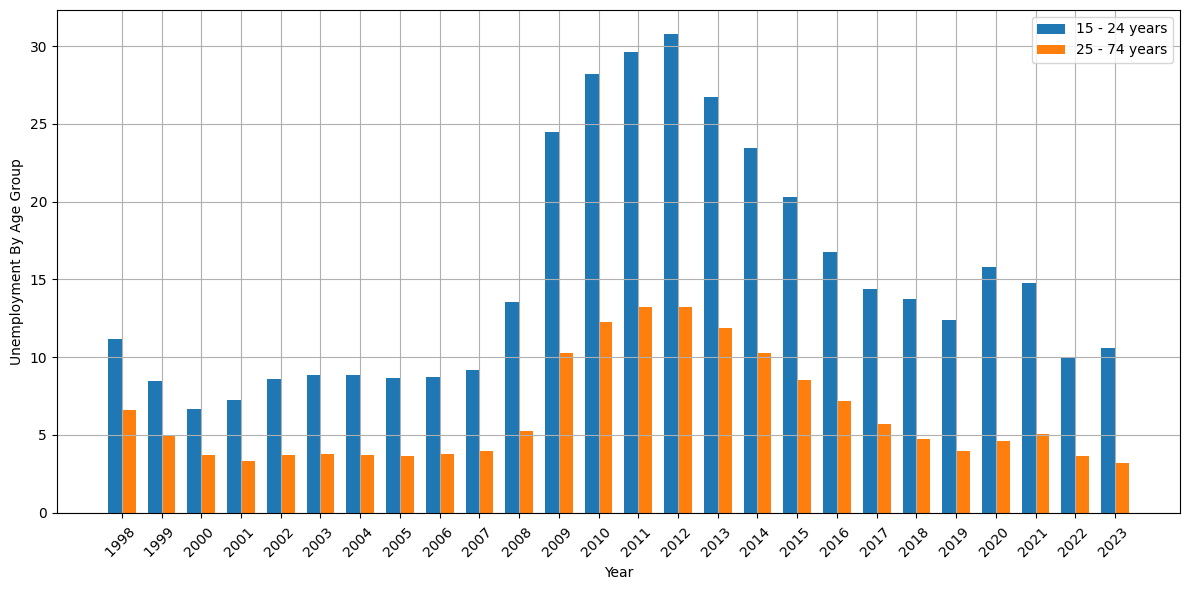

In [19]:
# First of all I am displaying a graph to show umemployment rate by age group for both sexes(Male and Female)
#To create our second graph we first need to convert Month column to string
MonthlyUnemployment_DF['Month']=MonthlyUnemployment_DF['Month'].astype(str)
# Now we are creating new olumn named "year" by spliting it into 2 parts using str.split('-') whenever there is a '-' and then takes the first box of list and assign it into year column
# so if the value will be 2023-1. it will extract 2023 from it
MonthlyUnemployment_DF['Year']= MonthlyUnemployment_DF['Month'].str.split('-').str[0]


# Firstly We need to filter our data and have to get both age groups (15-24 and 25 - 74) and select sex of both sex, which means selecting male and female both
filteredForBothSexDF=MonthlyUnemployment_DF[(MonthlyUnemployment_DF['Age Group'].isin(['15 - 24 years','25 - 74 years'])) & (MonthlyUnemployment_DF['Sex']=='Both sexes')]

# Now we are converting the month to text and get year from it
MonthlyUnemployment_DF['Month']=MonthlyUnemployment_DF['Month'].astype(str)
MonthlyUnemployment_DF['Year']= MonthlyUnemployment_DF['Month'].str.split('-').str[0].astype(int)

# We are grouping calculating the average unemployment rate by mean for eah group
unemploymentByYearAndAge = filteredForBothSexDF.groupby(['Year','Age Group'])['VALUE In Percentage'].mean().unstack()
# we are plotting bar graph. setting the size of plot first
plt.figure(figsize=(12,6))
# Here we are settign the width of every bar 
width=0.35
# Now we are getting the list of unique years from data and.
years=unemploymentByYearAndAge.index
# and now we are going from zero to number of years we have stored in years
x=range(len(years))
# Below line creates graph for age group of 15-24 years, we are positioning the bar with help of x and width sets the width of the bar, align centers them properly and width is controlling the width
plt.bar(x,unemploymentByYearAndAge['15 - 24 years'],width,label='15 - 24 years',align='center')
# This line is plotting a chart  for age group of 25 - 74 and we have to move this chart to little further by adding i + width for in x so it dosen't overlap
# to the first graph.
plt.bar([i + width for i in x],unemploymentByYearAndAge['25 - 74 years'],width,label='25 - 74 years',align='center')                                   

# this will write Year on the bottom of the ceart on horizontal axis
plt.xlabel('Year')
# This will set the label string at the vertical axis
plt.ylabel('Unemployment By Age Group')
# Now i am spreading the year and rorate them to look good on the graph
plt.xticks([i + width/2 for i in x], years, rotation=45)
# loc='best' plaes the legend in the most suitable spot on the chart
plt.legend(loc='best')
# with help of this method we can get reading values more accurate
plt.grid(True)
# This method qill help ius adjust the layout of the chart to look better
plt.tight_layout()
#This displays the graph
plt.show()

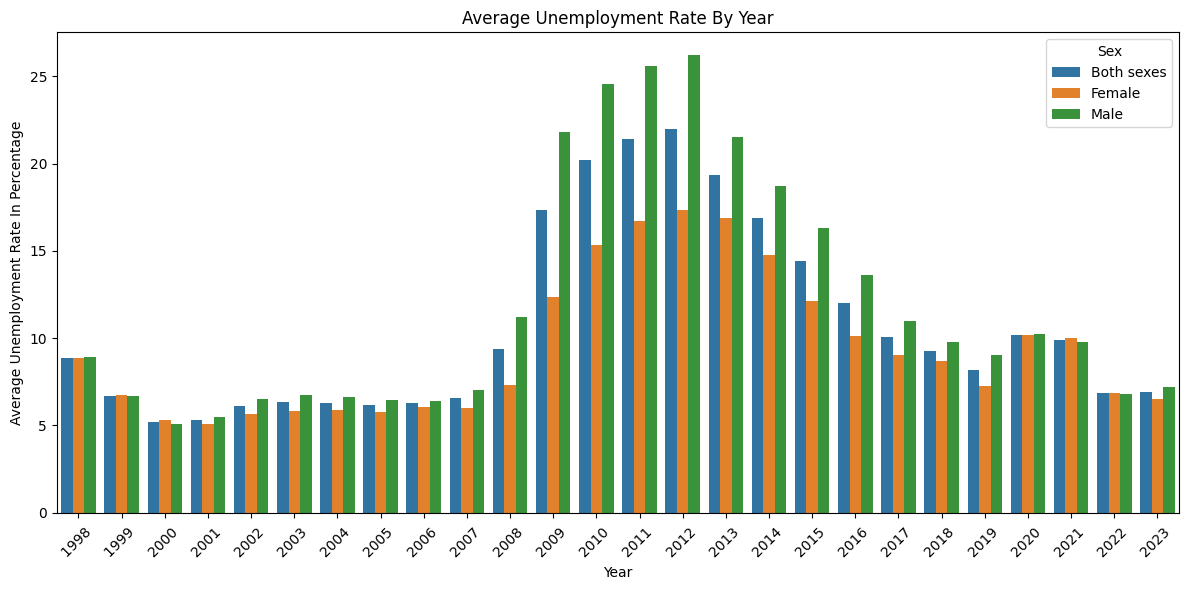

In [20]:
# We are creating second plot to create the graph which will display the unemployment rate in percentage per year for Male,Feale and both Sexes

#To create our second graph we first need to convert Month column to string
MonthlyUnemployment_DF['Month']=MonthlyUnemployment_DF['Month'].astype(str)
# Now we are creating new olumn named "year" by spliting it into 2 parts using str.split('-') whenever there is a '-' and then takes the first box of list and assign it into year column
# so if the value will be 2023-1. it will extract 2023 from it
MonthlyUnemployment_DF['Year']= MonthlyUnemployment_DF['Month'].str.split('-').str[0]

# Now calculate average employment rate per year  for both men and women seprately.
averageEmploymentPerYear= MonthlyUnemployment_DF.groupby(['Year','Sex'])['VALUE In Percentage'].mean().reset_index()
# Now lets set the size of chart
plt.figure(figsize=(12,6))
# Creating bar graph to show unemployment rate for every year
sbn.barplot(data=averageEmploymentPerYear, x='Year',y='VALUE In Percentage',hue='Sex')

# Now we are setting label and the horizontal axis and vertical axis, rotating year to look good and clear and plotting graph
plt.title('Average Unemployment Rate By Year')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate In Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

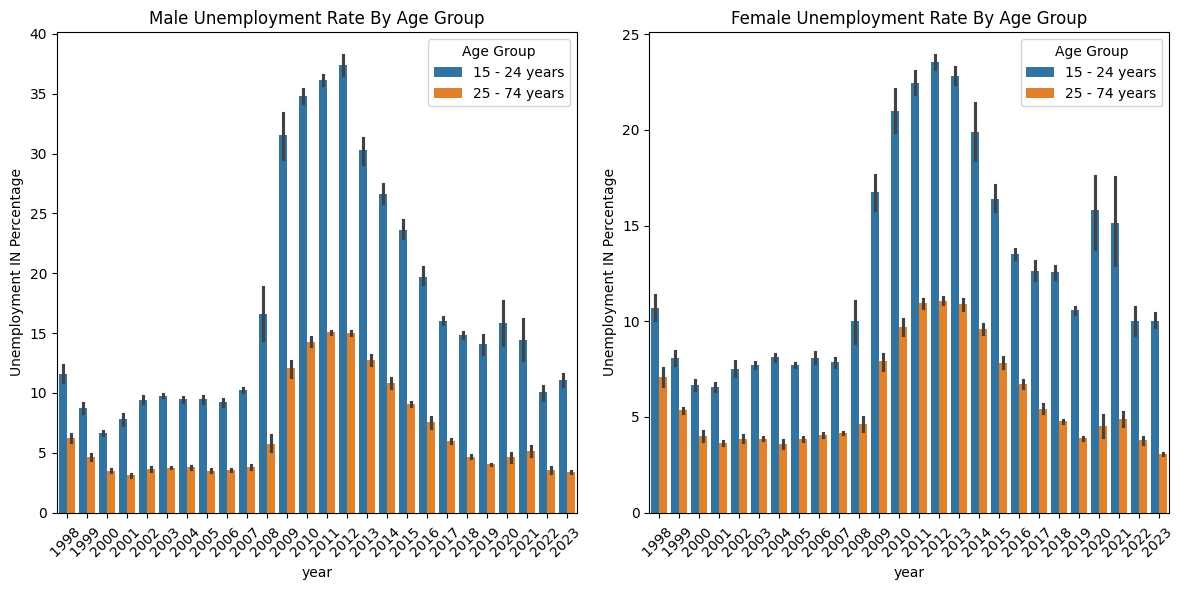

In [21]:
# We are creating Third plot to create the graph which will display the unemployment rate in percentage for Male and Female by age group

#To create our second graph we first need to convert Month column to string
MonthlyUnemployment_DF['Month']=MonthlyUnemployment_DF['Month'].astype(str)

# Now we are creating new olumn named "year" by spliting it into 2 parts using str.split('-') whenever there is a '-' and then takes the first box of list and assign it into year column
# so if the value will be 2023-1. it will extract 2023 from it
MonthlyUnemployment_DF['Year']= MonthlyUnemployment_DF['Month'].str.split('-').str[0]


#Here I am selecting some columns we need to work on later 
unemploymentDF=MonthlyUnemployment_DF[['Sex','Year','Age Group','VALUE In Percentage']]

#Since we need 2 different graphs to display for men and women we need to split the date for male and female
maleDF=unemploymentDF[unemploymentDF['Sex']=='Male']
femaleDF=unemploymentDF[unemploymentDF['Sex']=='Female']

# Below is the same proess we used aboe to plot graphs. here we are plottign 2 graphs for men and women seprately.
# we are setting the size of plot 
plt.figure(figsize=(12,6))
# We are dividing our graph into one row and two olumns
plt.subplot(1,2,1)
# Using seaborn to craete graph by using Male DataFrame
sbn.barplot(data=maleDF,x='Year',y='VALUE In Percentage',hue='Age Group')
#Setting the titles and horizontal ais and ertical axis title setting the year rotated so it will look good 
plt.title('Male Unemployment Rate By Age Group');
plt.xlabel('year')
plt.ylabel('Unemployment IN Percentage')
plt.xticks(rotation=45)
plt.legend(title="Age Group",loc='upper right')


#Here we are displaying the graph next to the Male graph by using Female  Dataframe
plt.subplot(1,2,2)
sbn.barplot(data=femaleDF,x='Year',y='VALUE In Percentage',hue='Age Group')
plt.title('Female Unemployment Rate By Age Group');
plt.xlabel('year')
plt.ylabel('Unemployment IN Percentage')
plt.xticks(rotation=45)
plt.legend(title="Age Group",loc='upper right')

plt.tight_layout()
plt.show()


# Question 2.	Apply statistical analysis to appropriate datasets and critique the limitations of these models

 ## Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. 
## Use Normal distribution to explain or identify some information about your dataset.


In [112]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import poisson

    X (Numers of Occurences)  Probability
0                        6.3     0.006315
1                        7.3     0.012942
2                        8.3     0.023329
3                        9.3     0.037531
4                       10.3     0.054517
5                       11.3     0.072182
6                       12.3     0.087801
7                       13.3     0.098770
8                       14.3     0.103339
9                       15.3     0.101053
10                      16.3     0.092755
11                      17.3     0.080217
12                      18.3     0.065583
13                      19.3     0.050841
14                      20.3     0.037471
15                      21.3     0.026320
16                      22.3     0.017659
17                      23.3     0.011339
18                      24.3     0.006982
19                      25.3     0.004129
20                      26.3     0.002349
21                      27.3     0.001287
22                      28.3     0

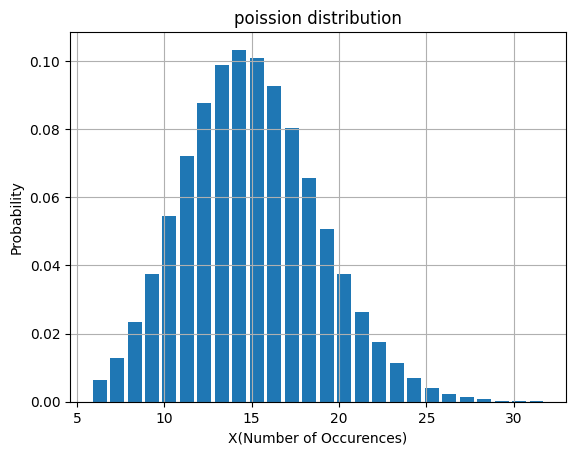

In [140]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column and january as a month for all years. and get the lambda for that to apply our model.


#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data.
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('January')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.4     0.006533
1                        7.4     0.013276
2                        8.4     0.023767
3                        9.4     0.038024
4                       10.4     0.054983
5                       11.4     0.072531
6                       12.4     0.087964
7                       13.4     0.098720
8                       14.4     0.103097
9                       15.4     0.100676
10                      16.4     0.092318
11                      17.4     0.079789
12                      18.4     0.065212
13                      19.4     0.050551
14                      20.4     0.037265
15                      21.4     0.026187
16                      22.4     0.017581
17                      23.4     0.011299
18                      24.4     0.006964
19                      25.4     0.004123
20                      26.4     0.002349
21                      27.4     0.001289
22                      28.4     0

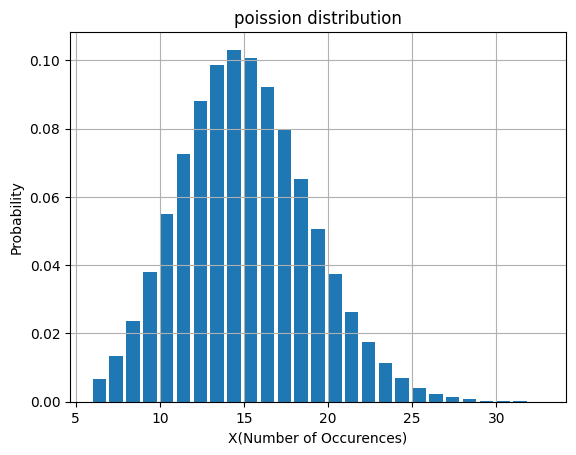

In [141]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for February
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('February')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.5     0.006934
1                        7.5     0.013932
2                        8.5     0.024699
3                        9.5     0.039178
4                       10.5     0.056227
5                       11.5     0.073678
6                       12.5     0.088822
7                       13.5     0.099147
8                       14.5     0.103039
9                       15.5     0.100175
10                      16.5     0.091489
11                      17.5     0.078781
12                      18.5     0.064171
13                      19.5     0.049590
14                      20.5     0.036453
15                      21.5     0.025550
16                      22.5     0.017112
17                      23.5     0.010973
18                      24.5     0.006749
19                      25.5     0.003988
20                      26.5     0.002268
21                      27.5     0.001243
22                      28.5     0

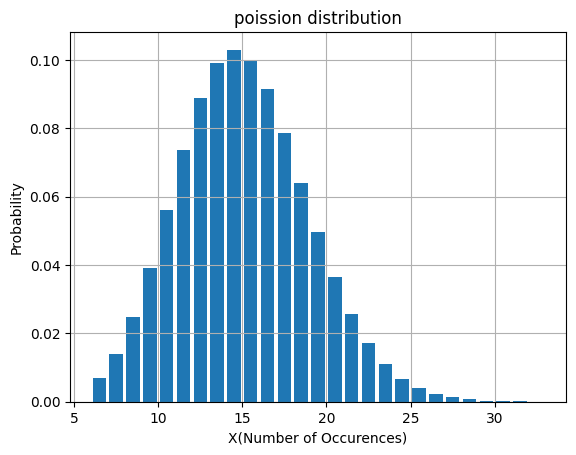

In [142]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for March
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('March')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.8     0.008364
1                        7.8     0.016229
2                        8.8     0.027911
3                        9.8     0.043104
4                       10.8     0.060404
5                       11.8     0.077473
6                       12.8     0.091604
7                       13.8     0.100463
8                       14.8     0.102734
9                       15.8     0.098408
10                      16.8     0.088653
11                      17.8     0.075378
12                      18.8     0.060682
13                      19.8     0.046383
14                      20.8     0.033750
15                      21.8     0.023431
16                      22.8     0.015553
17                      23.8     0.009890
18                      24.8     0.006036
19                      25.8     0.003541
20                      26.8     0.002000
21                      27.8     0.001089
22                      28.8     0

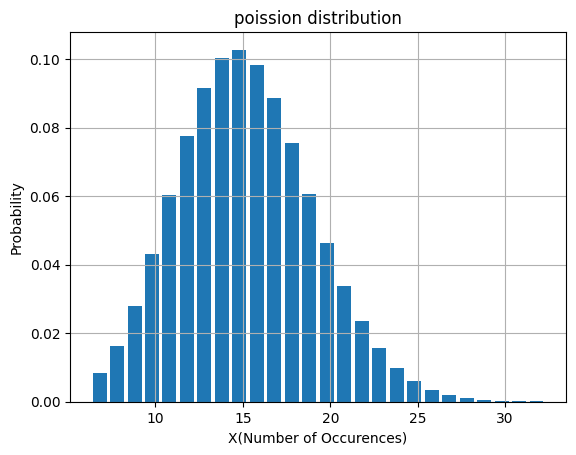

In [143]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for April
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('April')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.8     0.008507
1                        7.8     0.016472
2                        8.8     0.028272
3                        9.8     0.043573
4                       10.8     0.060937
5                       11.8     0.077998
6                       12.8     0.092037
7                       13.8     0.100733
8                       14.8     0.102801
9                       15.8     0.098272
10                      16.8     0.088350
11                      17.8     0.074968
12                      18.8     0.060229
13                      19.8     0.045944
14                      20.8     0.033362
15                      21.8     0.023114
16                      22.8     0.015312
17                      23.8     0.009717
18                      24.8     0.005918
19                      25.8     0.003465
20                      26.8     0.001953
21                      27.8     0.001061
22                      28.8     0

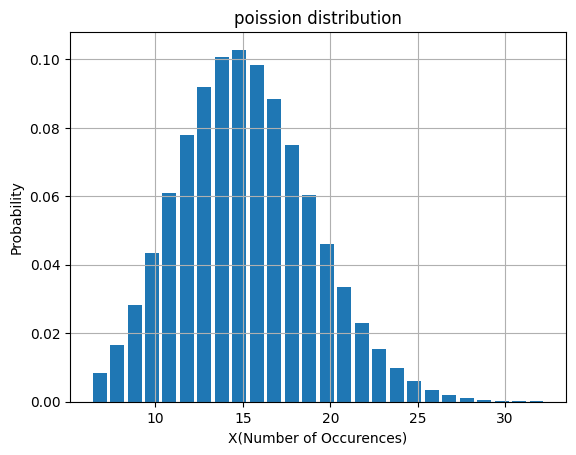

In [144]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for May
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('May')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.7     0.007838
1                        7.7     0.015390
2                        8.7     0.026745
3                        9.7     0.041687
4                       10.7     0.058905
5                       11.7     0.076119
6                       12.7     0.090619
7                       13.7     0.100007
8                       14.7     0.102859
9                       15.7     0.099054
10                      16.7     0.089678
11                      17.7     0.076602
12                      18.7     0.061934
13                      19.7     0.047533
14                      20.7     0.034718
15                      21.7     0.024189
16                      22.7     0.016111
17                      23.7     0.010278
18                      24.7     0.006291
19                      25.7     0.003701
20                      26.7     0.002096
21                      27.7     0.001144
22                      28.7     0

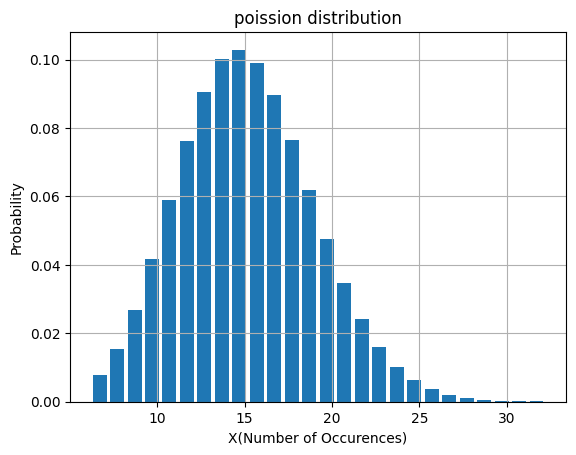

In [145]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for June
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('June')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.6     0.007226
1                        7.6     0.014386
2                        8.6     0.025310
3                        9.6     0.039892
4                       10.6     0.056943
5                       11.6     0.074275
6                       12.6     0.089194
7                       13.6     0.099233
8                       14.6     0.102840
9                       15.6     0.099747
10                      16.6     0.090919
11                      17.6     0.078163
12                      18.6     0.063584
13                      19.6     0.049086
14                      20.6     0.036054
15                      21.6     0.025255
16                      22.6     0.016909
17                      23.6     0.010841
18                      24.6     0.006668
19                      25.6     0.003941
20                      26.6     0.002242
21                      27.6     0.001229
22                      28.6     0

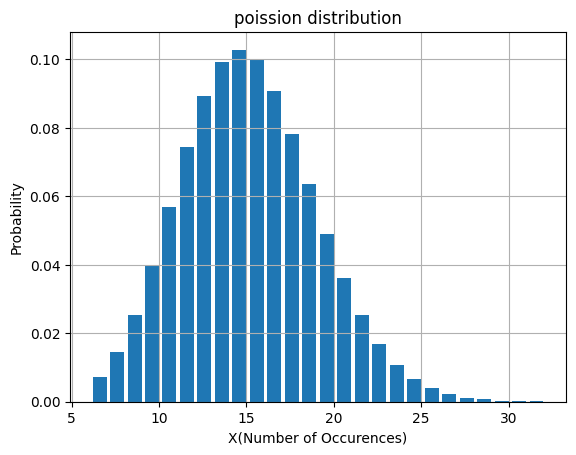

In [146]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for July
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('July')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.5     0.006710
1                        7.5     0.013533
2                        8.5     0.024084
3                        9.5     0.038349
4                       10.5     0.055248
5                       11.5     0.072672
6                       12.5     0.087945
7                       13.5     0.098543
8                       14.5     0.102804
9                       15.5     0.100329
10                      16.5     0.091980
11                      17.5     0.079507
12                      18.5     0.065011
13                      19.5     0.050432
14                      20.5     0.037213
15                      21.5     0.026182
16                      22.5     0.017603
17                      23.5     0.011331
18                      24.5     0.006996
19                      25.5     0.004150
20                      26.5     0.002369
21                      27.5     0.001303
22                      28.5     0

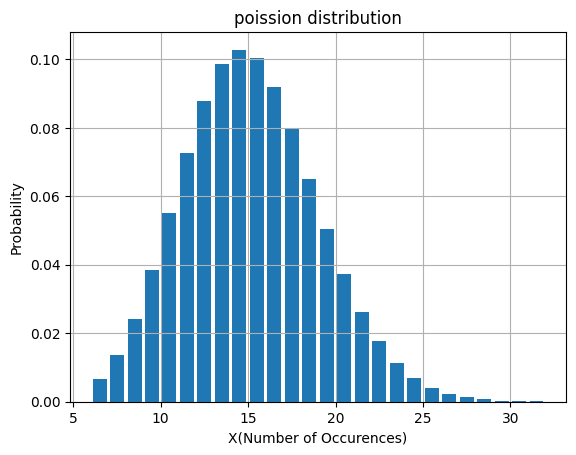

In [147]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for August
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('August')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.4     0.005938
1                        7.4     0.012201
2                        8.4     0.022083
3                        9.4     0.035717
4                       10.4     0.052216
5                       11.4     0.069638
6                       12.4     0.085385
7                       13.4     0.096879
8                       14.4     0.102287
9                       15.4     0.100984
10                      16.4     0.093619
11                      17.4     0.081803
12                      18.4     0.067593
13                      19.4     0.052973
14                      20.4     0.039480
15                      21.4     0.028049
16                      22.4     0.019038
17                      23.4     0.012370
18                      24.4     0.007708
19                      25.4     0.004614
20                      26.4     0.002657
21                      27.4     0.001474
22                      28.4     0

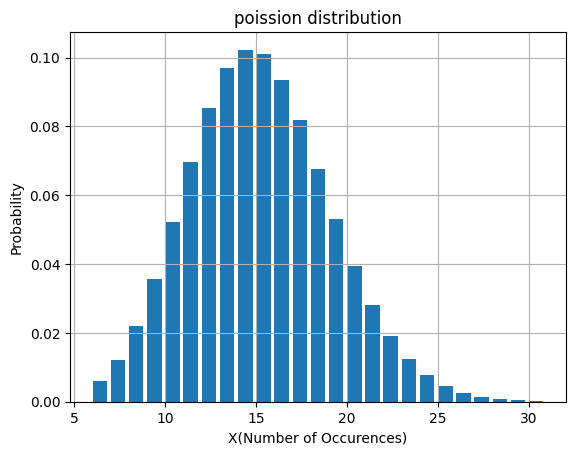

In [148]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for September
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('September')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.2     0.005020
1                        7.2     0.010609
2                        8.2     0.019687
3                        9.2     0.032560
4                       10.2     0.048572
5                       11.2     0.065988
6                       12.2     0.082302
7                       13.2     0.094871
8                       14.2     0.101659
9                       15.2     0.101766
10                      16.2     0.095585
11                      17.2     0.084559
12                      18.2     0.070695
13                      19.2     0.056026
14                      20.2     0.042203
15                      21.2     0.030290
16                      22.2     0.020761
17                      23.2     0.013616
18                      24.2     0.008561
19                      25.2     0.005170
20                      26.2     0.003002
21                      27.2     0.001679
22                      28.2     0

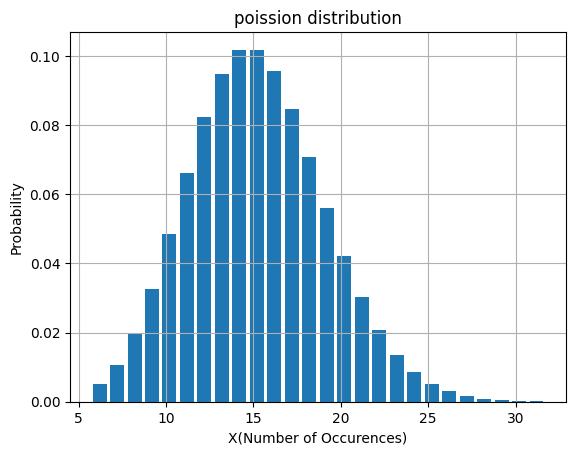

In [149]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for October
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('October')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.2     0.005116
1                        7.2     0.010789
2                        8.2     0.019979
3                        9.2     0.032974
4                       10.2     0.049086
5                       11.2     0.066546
6                       12.2     0.082823
7                       13.2     0.095272
8                       14.2     0.101874
9                       15.2     0.101766
10                      16.2     0.095384
11                      17.2     0.084204
12                      18.2     0.070250
13                      19.2     0.055556
14                      20.2     0.041761
15                      21.2     0.029910
16                      22.2     0.020457
17                      23.2     0.013389
18                      24.2     0.008401
19                      25.2     0.005062
20                      26.2     0.002934
21                      27.2     0.001638
22                      28.2     0

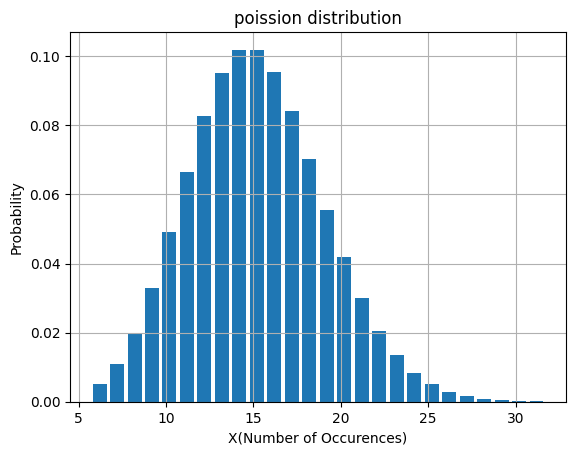

In [150]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for November
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('November')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()

    X (Numers of Occurences)  Probability
0                        6.3     0.005587
1                        7.3     0.011611
2                        8.3     0.021225
3                        9.3     0.034626
4                       10.3     0.051005
5                       11.3     0.068482
6                       12.3     0.084473
7                       13.3     0.096362
8                       14.3     0.102238
9                       15.3     0.101383
10                      16.3     0.094367
11                      17.3     0.082759
12                      18.3     0.068613
13                      19.3     0.053938
14                      20.3     0.040313
15                      21.3     0.028715
16                      22.3     0.019536
17                      23.3     0.012721
18                      24.3     0.007943
19                      25.3     0.004763
20                      26.3     0.002748
21                      27.3     0.001527
22                      28.3     0

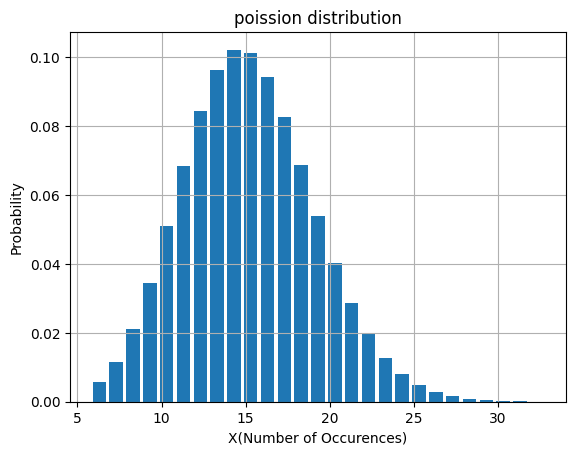

In [151]:
# Now let's use one of the model from poisson model and/or nomial.

# To apply our mode we have to  prepare our data. what i am going to do. i am going to get the Both Sexes (Male and Female)
# from Dataframe. Also i am selecting one age group (15 - 24) for now. W e will be taking years from 1998 to 2023 
# from Month column, and February as a month.  and get the lambda for that and then we can apply our model.

#Lets filter our data and get age group (15 - 24 years) and Both sex (Male And Female) from our data for December
dataForSexAndAgeAndYear=MonthlyUnemployment_DF[
    (MonthlyUnemployment_DF['Age Group']=='15 - 24 years') &
    (MonthlyUnemployment_DF['Sex'] == 'Both sexes') &
    MonthlyUnemployment_DF['Month'].str.endswith('December')
    ]
#print(dataForSexAndAgeAndYear)
dataForSexAndAgeAndYear=dataForSexAndAgeAndYear[
    (dataForSexAndAgeAndYear['Month']).str.startswith('1998') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('1999') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2000') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2001') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2002') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2003') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2004') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2005') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2006') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2007') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2008') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2009') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2010') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2011') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2012') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2013') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2014') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2015') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2016') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2017') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2018') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2019') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2020') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2021') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2022') |
    (dataForSexAndAgeAndYear['Month']).str.startswith('2023')     
    
]
#print(dataForSexAndAgeAndYear.shape)
# Letsfind the minimum and Maximum so we can use it later in our model. This is the minimum and maximum unemployment rate 
# for both sexes in january
minValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].min()
maxValueInFilteredData= dataForSexAndAgeAndYear['VALUE In Percentage'].max()

# Now we are converting unemployment percentage a range from 0 and 1 so it is better for our model
unemploymenyPercentage = dataForSexAndAgeAndYear['VALUE In Percentage'] / 100
 
# Calculate lambda which is the measure of average unemployment rate, and multiply it by 100 so it will be interpretable
myLambda=np.mean(unemploymenyPercentage)
myLambda = myLambda* 100

#print(minValueInFilteredData)
#print(maxValueInFilteredData)

# Now we need range of possible values so i am using min and max unemployement rate
valuesOfX=np.arange(minValueInFilteredData,maxValueInFilteredData + 1)
# Lets apply the model now to calculate teh probability of every valuesOfX 
poissonModelValues=[poisson.pmf(valuesOfX,myLambda) for valuesOfX in valuesOfX]
# Now we are creating a dataframe of our values  and printing it to see results

PredictionTable=pd.DataFrame({'X (Numers of Occurences)': valuesOfX, 'Probability':poissonModelValues })
print(PredictionTable)

# Now Lets create graph as well for better understanding. it will show unemployment arte probabilities with a title
# and horizontal and vertical labels on it

plt.bar(valuesOfX,poissonModelValues)
plt.xlabel('X(Number of Occurences)')
plt.ylabel('Probability')
plt.title('poission distribution')
plt.grid(True)
plt.show()